#ASSOCIATION RULES


In [2]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=6b400670df4d7934d7da8b546f098d203011fd9ca5d4bc5be6c88ec5a10686c8
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel('/content/Online retail.xlsx',header=None)
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [5]:
from apyori import apriori
# Convert the DataFrame to the required list of lists format
transactions = df[0].apply(lambda x: [item.strip() for item in x.split(',')]).tolist()

apriori_results = apriori(transactions, min_support=0.005, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

In [6]:
reports = list(apriori_results)
reports

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [7]:
len(reports)

6

In [8]:
reports[0]

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [9]:
reports[0][1] #support
reports[0][2][0][0] #base
reports[0][2][0][1] #add
reports[0][2][0][2] #confidence
reports[0][2][0][3] #lift

3.790832696715049

In [10]:
a = [] # for base items
b = [] # for add items
c = [] # for support
d = [] # for confidence
e = [] # for lift

for report in reports:
  # Extract base and add items from ordered_statistics
  base_items = ', '.join(list(report[2][0][0]))
  add_items = ', '.join(list(report[2][0][1]))

  a.append(base_items)
  b.append(add_items)
  c.append(report[1]) # Support
  d.append(report[2][0][2]) # Confidence
  e.append(report[2][0][3]) # Lift

Base = pd.DataFrame(a, columns=["Base"])
Add = pd.DataFrame(b, columns=["Add"])
Support = pd.DataFrame(c, columns=["Support"])
Confidence = pd.DataFrame(d, columns=["Confidence"])
Lift = pd.DataFrame(e, columns=["Lift"])


df_new  = pd.concat([Base, Add, Support, Confidence, Lift], axis=1)
df_new

,Base,Add,Support,Confidence,Lift
0,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
1,pasta,escalope,0.005866,0.372881,4.700812
2,herb & pepper,ground beef,0.015998,0.323450,3.291994
3,tomato sauce,ground beef,0.005333,0.377358,3.840659
4,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,pasta,shrimp,0.005066,0.322034,4.506672


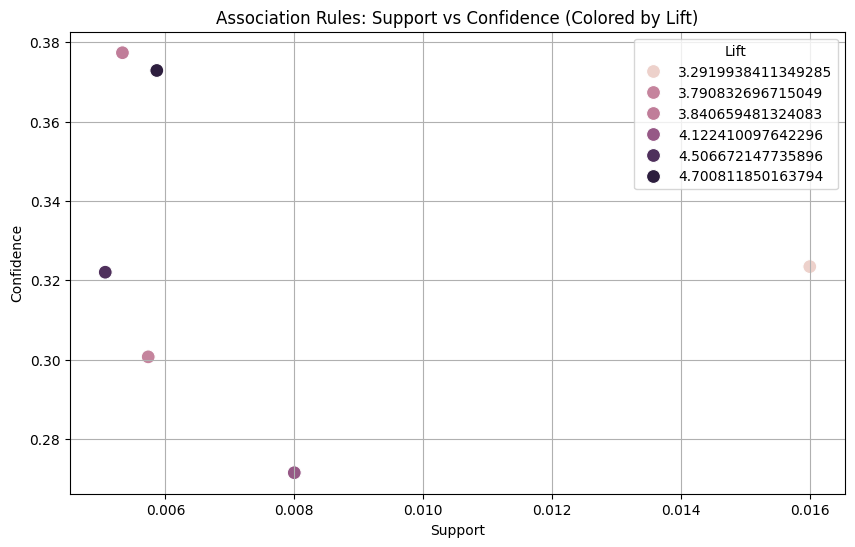

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Support', y='Confidence', hue='Lift', data=df_new, s=100)
plt.title('Association Rules: Support vs Confidence (Colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

Here is a more comprehensive interpretation of each association rule:

In [12]:
for index, row in df_new.iterrows():
    base = row['Base']
    add = row['Add']
    support = row['Support']
    confidence = row['Confidence']
    lift = row['Lift']

    print(f"Rule {index + 1}:")
    print(f"  Base Item(s): {base}")
    print(f"  Add Item(s): {add}")
    print(f"  Support: {support:.4f} (This means {support:.2%} of all transactions contain both {base} and {add})")
    print(f"  Confidence: {confidence:.4f} (This means that when {base} is purchased, there is a {confidence:.2%} chance that {add} is also purchased)")
    print(f"  Lift: {lift:.4f} (A lift value greater than 1 indicates that {base} and {add} are more likely to be purchased together than individually. A lift of {lift:.4f} means the likelihood of purchasing {add} when {base} is purchased is {lift:.2f} times higher than the likelihood of purchasing {add} alone.)")
    print("-" * 30)

Rule 1:
  Base Item(s): mushroom cream sauce
  Add Item(s): escalope
  Support: 0.0057 (This means 0.57% of all transactions contain both mushroom cream sauce and escalope)
  Confidence: 0.3007 (This means that when mushroom cream sauce is purchased, there is a 30.07% chance that escalope is also purchased)
  Lift: 3.7908 (A lift value greater than 1 indicates that mushroom cream sauce and escalope are more likely to be purchased together than individually. A lift of 3.7908 means the likelihood of purchasing escalope when mushroom cream sauce is purchased is 3.79 times higher than the likelihood of purchasing escalope alone.)
------------------------------
Rule 2:
  Base Item(s): pasta
  Add Item(s): escalope
  Support: 0.0059 (This means 0.59% of all transactions contain both pasta and escalope)
  Confidence: 0.3729 (This means that when pasta is purchased, there is a 37.29% chance that escalope is also purchased)
  Lift: 4.7008 (A lift value greater than 1 indicates that pasta and es

#Answers for Interview questions:

* Lift is a parameter which is used to determine the no.of times the item is being lifted by the other item, that means the add item will be the number of times the base item, if the lift is more it increases the purchase of add item along with the base item, that is why lift parameter is very much useful in the association rules.

* Support is the probality of one or more items and it's calculated using probability function,confidence is the conditional probability of two items and it is calculated using P[A/B] formula.

* The limitations for the mining techinque is that it only calculates the certain parameters but does not recommend efficiently,we need to use the recommendation sytem method for efficient recommendations.The main challenges of ARM are too many rules, high computation cost, threshold tuning, rare item neglect, spurious correlations, and difficulty scaling to large/complex datasets